# 1. Load Data

In [1]:
from utils.data_loading_utils import *
from transformers.featureGenerator import FeatureGenerator
from utils.metrics_utils import *

import warnings
warnings.filterwarnings("ignore")

In [2]:
cols = ["stabilizer.roll", "stabilizer.pitch", "stabilizer.yaw"]

In [3]:
drone = 'drone2'

### No Wind Data

In [4]:
no_wind = load_data(0, 10, drone)[cols]
no_wind_transformer = FeatureGenerator(1, 'stabilizer', False, 0)
no_wind_transformer.fit(no_wind, 1)
no_wind_transformed = no_wind_transformer.transform(no_wind)

In [5]:
no_wind_transformed['label'] = [0 for x in range(no_wind_transformed.shape[0])]

### Train/Test Split - 8:2

In [6]:
no_wind_size = no_wind_transformed.shape[0]
no_wind_train = no_wind_transformed.iloc[:int(no_wind_size*0.8), :]
no_wind_test = no_wind_transformed.iloc[int(no_wind_size*0.8):, :]

### Front Wind Data

In [7]:
front = load_data(1, 10, drone)[cols]
front_transformer = FeatureGenerator(1, 'stabilizer', False, 0)
front_transformer.fit(front, 1)
front_transformed = front_transformer.transform(front)

In [8]:
front_transformed['label'] = [1 for x in range(front_transformed.shape[0])]

### Train/Test Split - 8:2

In [9]:
front_wind_size = front_transformed.shape[0]
front_wind_train = front_transformed.iloc[:int(front_wind_size*0.8), :]
front_wind_test = front_transformed.iloc[int(front_wind_size*0.8):, :]

### Back Wind Data

In [10]:
back = load_data(2, 10, drone)[cols]
back_transformer = FeatureGenerator(1, 'stabilizer', False, 0)
back_transformer.fit(back, 1)
back_transformed = back_transformer.transform(back)

In [11]:
back_transformed['label'] = [2 for x in range(back_transformed.shape[0])]

### Train/Test Split - 8:2

In [12]:
back_wind_size = back_transformed.shape[0]
back_wind_train = back_transformed.iloc[:int(back_wind_size*0.8), :]
back_wind_test = back_transformed.iloc[int(back_wind_size*0.8):, :]

### Left Wind Data

In [13]:
left = load_data(3, 10, drone)[cols]
left_transformer = FeatureGenerator(1, 'stabilizer', False, 0)
left_transformer.fit(left, 1)
left_transformed = back_transformer.transform(left)

In [14]:
left_transformed['label'] = [3 for x in range(left_transformed.shape[0])]

### Train/Test Split - 8:2

In [15]:
left_wind_size = left_transformed.shape[0]
left_wind_train = left_transformed.iloc[:int(left_wind_size*0.8), :]
left_wind_test = left_transformed.iloc[int(left_wind_size*0.8):, :]

### Right Wind Data

In [16]:
right = load_data(4, 10, drone)[cols]
right_transformer = FeatureGenerator(1, 'stabilizer', False, 0)
right_transformer.fit(right, 1)
right_transformed = right_transformer.transform(right)

In [17]:
right_transformed['label'] = [4 for x in range(right_transformed.shape[0])]

### Train/Test Split - 8:2

In [18]:
right_wind_size = right_transformed.shape[0]
right_wind_train = right_transformed.iloc[:int(right_wind_size*0.8), :]
right_wind_test = right_transformed.iloc[int(right_wind_size*0.8):, :]

In [19]:
right_wind_train.columns.values

array(['mu_x_stabilizer', 'mu_y_stabilizer', 'mu_z_stabilizer',
       'std_x_stabilizer', 'std_y_stabilizer', 'std_z_stabilizer',
       'avg_resultant_acc_stabilizer', 'bin_0_stabilizer',
       'bin_1_stabilizer', 'bin_2_stabilizer', 'bin_3_stabilizer',
       'bin_4_stabilizer', 'bin_5_stabilizer', 'bin_6_stabilizer',
       'bin_7_stabilizer', 'bin_8_stabilizer', 'bin_9_stabilizer',
       'bin_10_stabilizer', 'bin_11_stabilizer', 'bin_12_stabilizer',
       'bin_13_stabilizer', 'bin_14_stabilizer', 'bin_15_stabilizer',
       'bin_16_stabilizer', 'bin_17_stabilizer', 'bin_18_stabilizer',
       'bin_19_stabilizer', 'bin_20_stabilizer', 'bin_21_stabilizer',
       'bin_22_stabilizer', 'bin_23_stabilizer', 'bin_24_stabilizer',
       'bin_25_stabilizer', 'bin_26_stabilizer', 'bin_27_stabilizer',
       'bin_28_stabilizer', 'bin_29_stabilizer',
       'mean_abs_difference_x_stabilizer',
       'mean_abs_difference_y_stabilizer',
       'mean_abs_difference_z_stabilizer', 'label'], d

# 2. Statistics Comparison

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
from utils.metrics_utils import *
%matplotlib inline

In [21]:
no_wind_temp = no_wind_transformed
no_wind_temp['label'] = ['no wind' for x in range(no_wind_temp.shape[0])]

In [22]:
front_wind_temp = front_transformed
front_wind_temp['label'] = ['front wind' for x in range(front_wind_temp.shape[0])]

In [23]:
back_wind_temp = back_transformed
back_wind_temp['label'] = ['back wind' for x in range(back_wind_temp.shape[0])]

In [24]:
right_temp = right_transformed
right_temp['label'] = ['right wind' for x in range(right_temp.shape[0])]

In [25]:
left_temp = left_transformed
left_temp['label'] = ['left wind' for x in range(left_temp.shape[0])]

In [26]:
combined_train = no_wind_train.append(front_wind_train, ignore_index=True)
combined_train = combined_train.append(back_wind_train, ignore_index=True)
combined_train = combined_train.append(right_wind_train, ignore_index=True)
combined_train = combined_train.append(left_wind_train, ignore_index=True)

In [27]:
X_train = combined_train.iloc[:, :-1]
y_train = combined_train.iloc[:, -1]

In [30]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [31]:
combined_test = no_wind_test.append(front_wind_test)
combined_test = combined_test.append(back_wind_test)
combined_test = combined_test.append(right_wind_test)
combined_test = combined_test.append(left_wind_test)

In [32]:
X_test = combined_test.iloc[:, :-1]
y_test = combined_test.iloc[:, -1]

In [33]:
y_pred = clf.predict(X_test)

In [34]:
get_confusion_matrix(y_test, y_pred)

,actual_0,actual_1,actual_2,actual_3,actual_4
predicted_0,3281,297,189,2,0
predicted_1,8,2463,958,226,125
predicted_2,76,612,2005,676,409
predicted_3,186,212,645,1982,753
predicted_4,1,895,504,1194,1187


In [35]:
clf.score(X_test, y_test)

0.5781001800275336

# 3. Visualization in Frequency-Domain

In [36]:
from scipy import signal

In [37]:
def plot_in_frequency_domain(data, label, sensor, color):
    x = data[sensor+'.roll']
    y = data[sensor+'.pitch']
    z = data[sensor+'.yaw']
    f = plt.figure(figsize=(15, 3))
    ax = f.add_subplot(131)
    ax2 = f.add_subplot(132)
    ax3 = f.add_subplot(133)
    
    x_fft = np.fft.fft(x)
    f_x = np.fft.fftfreq(x.shape[0])
    Pxx_den_x = (x_fft*np.conj(x_fft))/x_fft.shape[0]
    ax.set_title(sensor + ': roll axis, label: ' + str(label))
    ax.plot(f_x, Pxx_den_x, color=color)
    
    y_fft = np.fft.fft(y)
    f_y = np.fft.fftfreq(y.shape[0])
    Pxx_den_y = (y_fft*np.conj(y_fft))/y_fft.shape[0]
    ax2.set_title(sensor + ': pitch axis, label: ' + str(label))
    ax2.plot(f_y, Pxx_den_y, color=color)
    
    z_fft = np.fft.fft(z)
    f_z = np.fft.fftfreq(z.shape[0])
    Pxx_den_z = (z_fft*np.conj(z_fft))/z_fft.shape[0]
    ax3.set_title(sensor + ': yaw axis, label: ' + str(label))
    ax3.plot(f_z, Pxx_den_z, color=color)

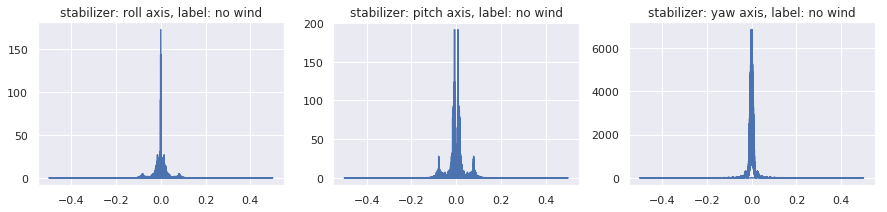

In [38]:
plot_in_frequency_domain(no_wind, 'no wind', 'stabilizer', 'b')

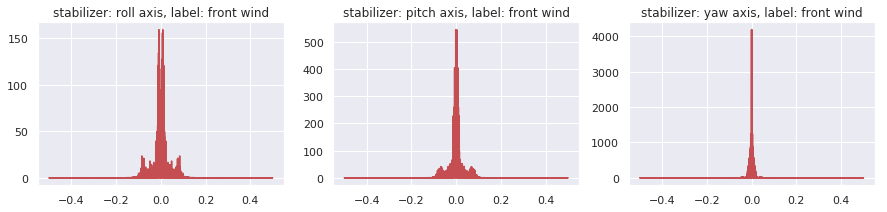

In [39]:
    plot_in_frequency_domain(front, 'front wind', 'stabilizer', 'r')

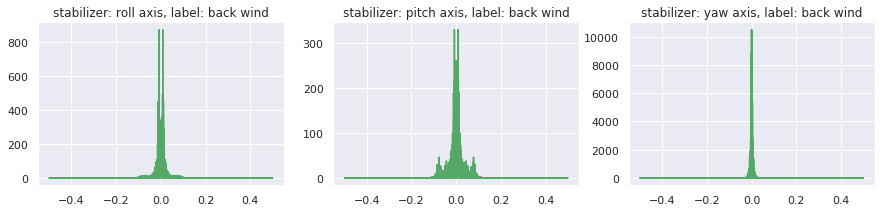

In [40]:
plot_in_frequency_domain(back, 'back wind', 'stabilizer', 'g')

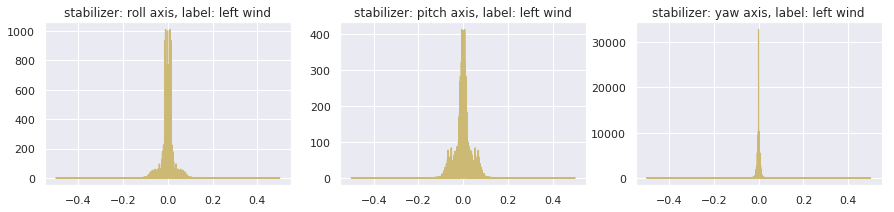

In [41]:
plot_in_frequency_domain(left, 'left wind', 'stabilizer', 'y')

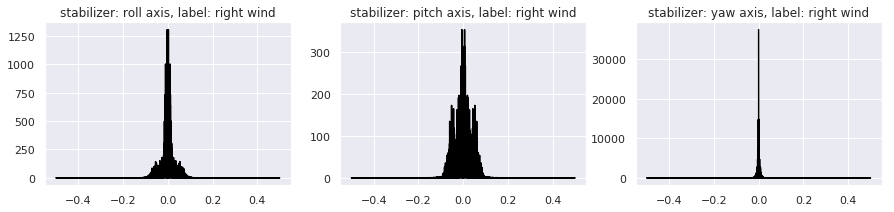

In [42]:
plot_in_frequency_domain(right, 'right wind', 'stabilizer', 'black')

# 4. Visualization in Time-Domain

In [43]:
no_wind_sample = no_wind.iloc[1000:1700, :]
front_wind_sample = front.iloc[1000:1700, :]
back_wind_sample = back.iloc[1000:1700, :]
left_wind_sample = left.iloc[1000:1700, :]
right_wind_sample = right.iloc[1000:1700, :]

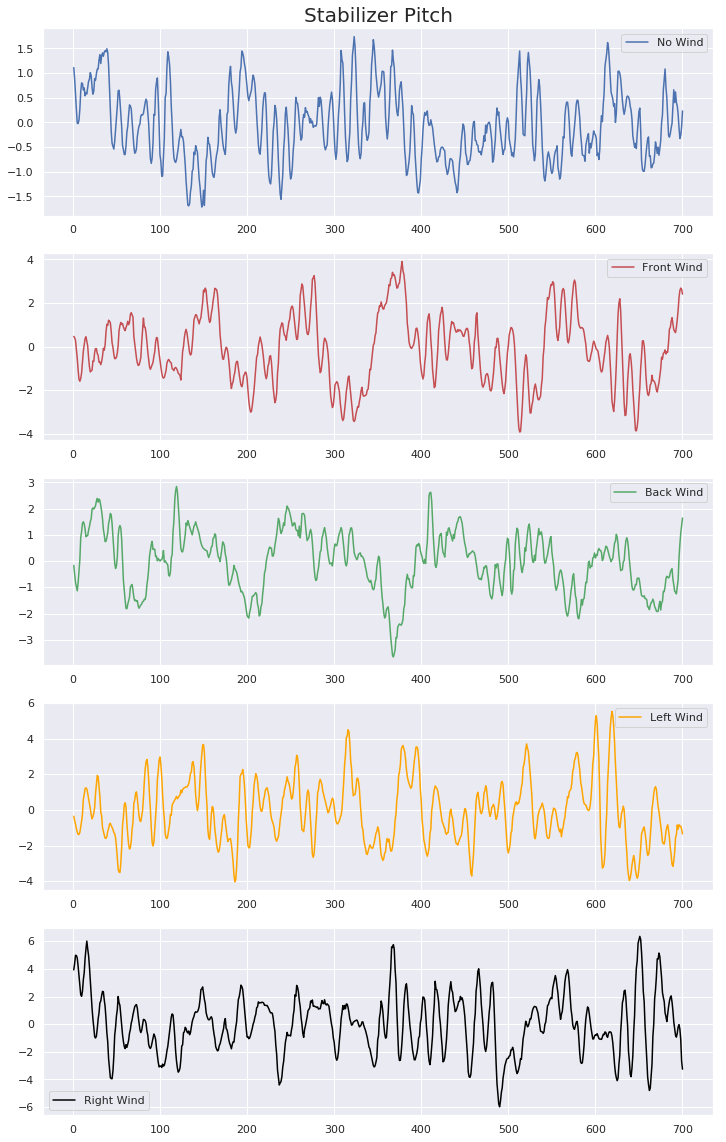

In [44]:
fig = plt.figure(figsize=(12, 20))

ax1_no_wind = fig.add_subplot(5, 1, 1)
ax1_no_wind.set_title('Stabilizer Pitch', fontsize=20)
ax1_no_wind.plot([x for x in range(1, 701)], no_wind_sample["stabilizer.pitch"])
ax1_no_wind.legend(['No Wind'])

ax2_front_wind = fig.add_subplot(5, 1, 2)
ax2_front_wind.plot([x for x in range(1, 701)], front_wind_sample["stabilizer.pitch"], color='r')
ax2_front_wind.legend(['Front Wind'])

ax3_back_wind = fig.add_subplot(5, 1, 3)
ax3_back_wind.plot([x for x in range(1, 701)], back_wind_sample["stabilizer.pitch"], color='g')
ax3_back_wind.legend(['Back Wind'])

ax4_left_wind = fig.add_subplot(5, 1, 4)
ax4_left_wind.plot([x for x in range(1, 701)], left_wind_sample["stabilizer.pitch"], color='orange')
ax4_left_wind.legend(['Left Wind'])

ax5_right_wind = fig.add_subplot(5, 1, 5)
ax5_right_wind.plot([x for x in range(1, 701)], right_wind_sample["stabilizer.pitch"], color='black')
_ = ax5_right_wind.legend(['Right Wind'])

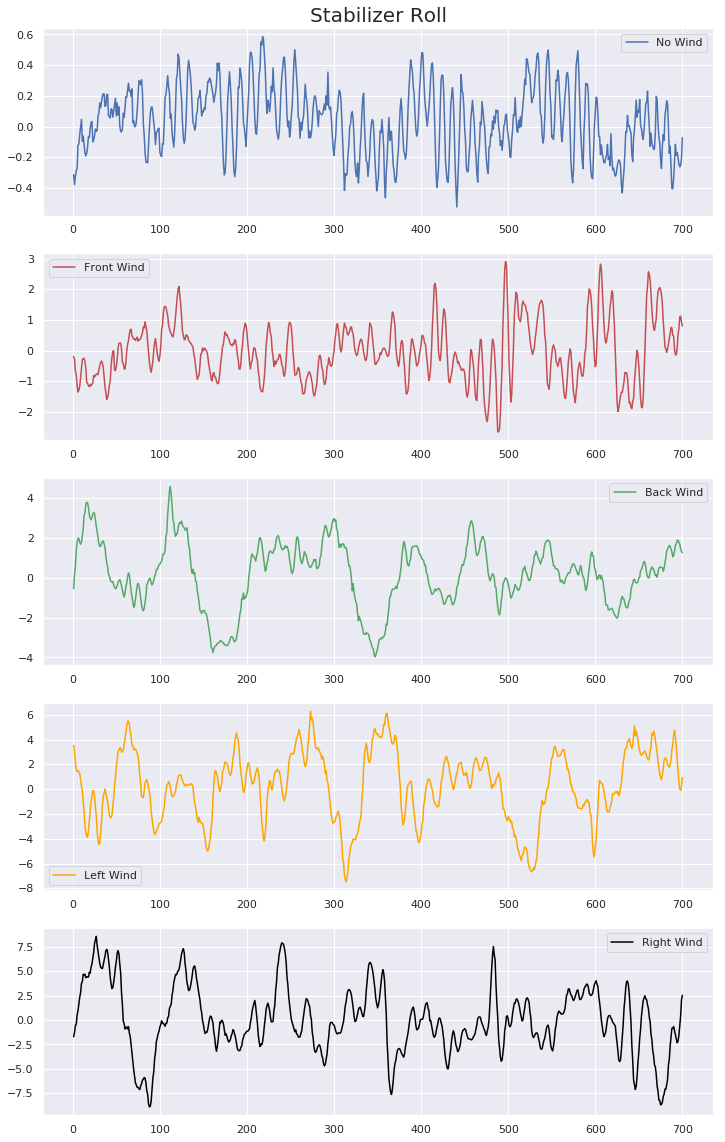

In [45]:
fig = plt.figure(figsize=(12, 20))

ax1_no_wind = fig.add_subplot(5, 1, 1)
ax1_no_wind.set_title('Stabilizer Roll', fontsize=20)
ax1_no_wind.plot([x for x in range(1, 701)], no_wind_sample["stabilizer.roll"])
ax1_no_wind.legend(['No Wind'])

ax2_front_wind = fig.add_subplot(5, 1, 2)
ax2_front_wind.plot([x for x in range(1, 701)], front_wind_sample["stabilizer.roll"], color='r')
ax2_front_wind.legend(['Front Wind'])

ax3_back_wind = fig.add_subplot(5, 1, 3)
ax3_back_wind.plot([x for x in range(1, 701)], back_wind_sample["stabilizer.roll"], color='g')
ax3_back_wind.legend(['Back Wind'])

ax4_left_wind = fig.add_subplot(5, 1, 4)
ax4_left_wind.plot([x for x in range(1, 701)], left_wind_sample["stabilizer.roll"], color='orange')
ax4_left_wind.legend(['Left Wind'])

ax5_right_wind = fig.add_subplot(5, 1, 5)
ax5_right_wind.plot([x for x in range(1, 701)], right_wind_sample["stabilizer.roll"], color='black')
_ = ax5_right_wind.legend(['Right Wind'])

# Compute Similiarity between Each Pair of Signals

In [46]:
def norm_corr(signal1, signal2):
    numerator = np.sum((signal1-np.mean(signal1))*(signal2-np.mean(signal2)))
    denominator = np.sqrt(np.sum(np.power(signal1-np.mean(signal1), 2))*np.sum(np.power(signal2-np.mean(signal2), 2)))
    
    return numerator/denominator

In [47]:
corr_roll = pd.DataFrame(data=[], 
                         columns=['no wind', 'front wind', 'back wind', 'left wind', 'right wind'],
                        index=['no wind', 'front wind', 'back wind', 'left wind', 'right wind'])
corr_pitch = pd.DataFrame(data=[], 
                         columns=['no wind', 'front wind', 'back wind', 'left wind', 'right wind'],
                        index=['no wind', 'front wind', 'back wind', 'left wind', 'right wind'])

In [48]:
for i, data1 in zip([0, 1, 2 ,3 ,4], [no_wind, front, back, left, right]):
    temp_roll = []
    temp_pitch = []
    for data2 in [no_wind, front, back, left, right]:
        temp_roll.append(norm_corr(data1['stabilizer.roll'], data2['stabilizer.roll']))
        temp_pitch.append(norm_corr(data1['stabilizer.pitch'], data2['stabilizer.pitch']))
    corr_roll.iloc[i, :] = temp_roll
    corr_pitch.iloc[i, :] = temp_pitch

In [49]:
corr_roll

,no wind,front wind,back wind,left wind,right wind
no wind,1,0.0158075,-0.00436734,0.0239217,0.0254452
front wind,0.0158075,1,0.0172072,-0.000688151,0.0250581
back wind,-0.00436734,0.0172072,1,-0.0260856,0.0247291
left wind,0.0239217,-0.000688151,-0.0260856,1,-0.0640018
right wind,0.0254452,0.0250581,0.0247291,-0.0640018,1
